In [66]:
# Get the critical imports out of the way
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import HTML 
# Center matplotlib figures...
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [67]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
!apt-get install libsox-fmt-all libsox-dev sox > /dev/null
! python -m pip install torchaudio > /dev/null
! python -m pip install git+https://github.com/facebookresearch/WavAugment.git > /dev/null

  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/WavAugment.git /tmp/pip-req-build-jqrdr770


In [69]:
!pip install ffmpeg-python > /dev/null

In [70]:
# pip install torchaudio==0.9.0


In [71]:
# pip install torch==1.9.0


In [72]:
# pip install pydub

In [73]:
# for i in glob.glob("/content/drive/MyDrive/RAVDESS dataset/Actor_*/*.wav"):
#   print(i)
#   try:

#     x, sr = torchaudio.load(i)
#     X = augment.EffectChain().reverb(50, 50, 50).channels(1).apply(x, src_info={'rate': sr})
#     file_name_mp3="r_"+os.path.basename(i)
#     audio = ipd.Audio(X, rate=sr)
#     audio = AudioSegment(audio.data)
#     audio.export("/content/drive/MyDrive/Augmented_files" + '/' + file_name_mp3, format="wav", bitrate="64k")
#   except:
#     print("filenotfound",i)
#     break

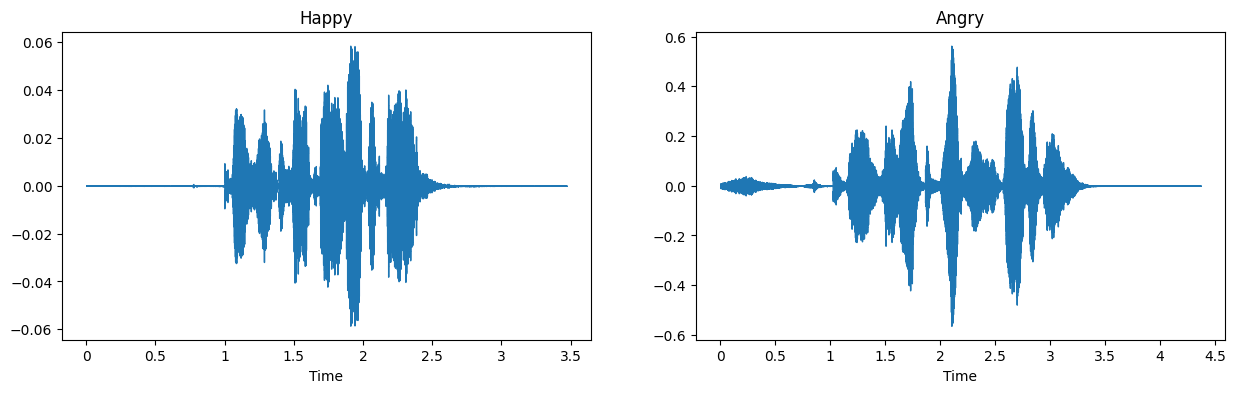

In [74]:
################# Load Happy and Angry example of Actor 1 #####################################
with soundfile.SoundFile('/content/drive/MyDrive/RAVDESS dataset/Actor_01/03-01-03-01-01-01-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Happy')

with soundfile.SoundFile('/content/drive/MyDrive/RAVDESS dataset/Actor_01/03-01-05-02-01-02-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Angry')

### Mel-Frequency Cepstral Coefficients


In [75]:
with soundfile.SoundFile('/content/drive/MyDrive/RAVDESS dataset/Actor_01/03-01-03-01-01-01-01.wav') as audio:
    happy_waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate

with soundfile.SoundFile('/content/drive/MyDrive/RAVDESS dataset/Actor_01/03-01-05-02-01-02-01.wav') as audio:
    angry_waveform = audio.read(dtype="float32")
    # same sample rate

###### Visualize our sample's MFC coefficients w.r.t time:

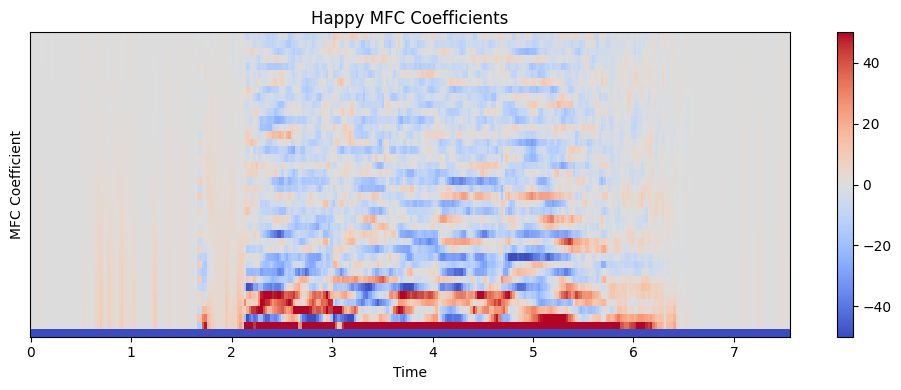

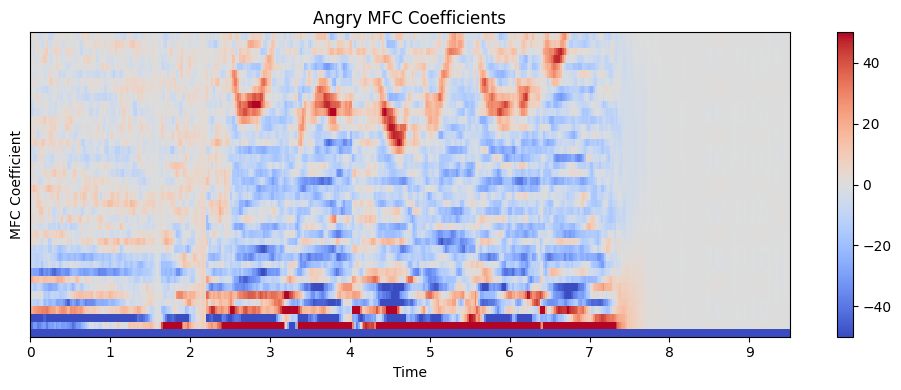

In [76]:
from matplotlib.colors import Normalize
mfc_coefficients = librosa.feature.mfcc(y=happy_waveform, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-50,vmax=50))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Happy MFC Coefficients')
plt.tight_layout()
                                        
mfc_coefficients = librosa.feature.mfcc(y=angry_waveform, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-50,vmax=50))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Angry MFC Coefficients')
plt.tight_layout()

### Mel Spectrograms and Mel-Frequency Cepstrums


##### Visualize our sample's Mel spectrogram w.r.t time:

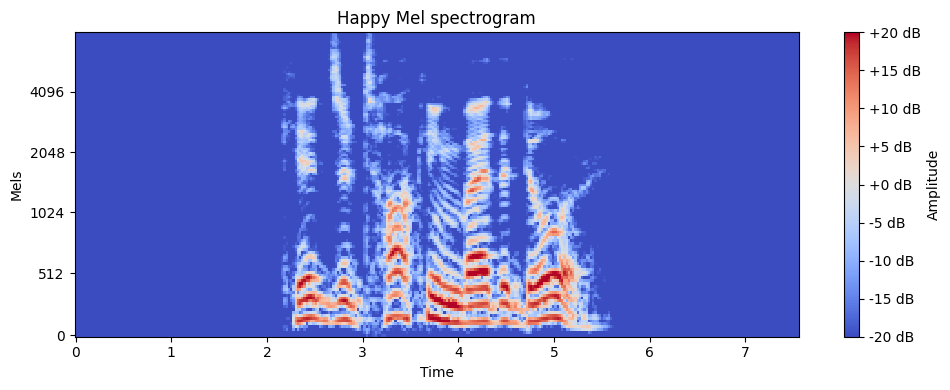

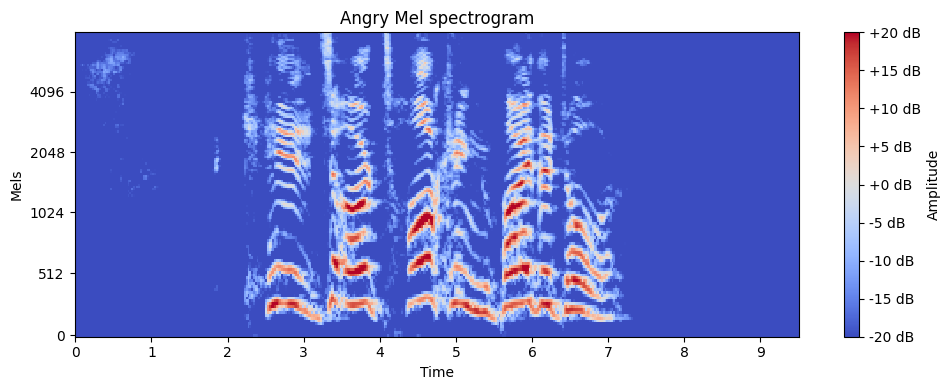

In [77]:
melspectrogram = librosa.feature.melspectrogram(y=happy_waveform, sr=sample_rate, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('Happy Mel spectrogram')
plt.tight_layout()

melspectrogram = librosa.feature.melspectrogram(y=angry_waveform, sr=sample_rate, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('Angry Mel spectrogram')
plt.tight_layout()

### The Chromagram


##### Visualize the chromagram for our sample audio:

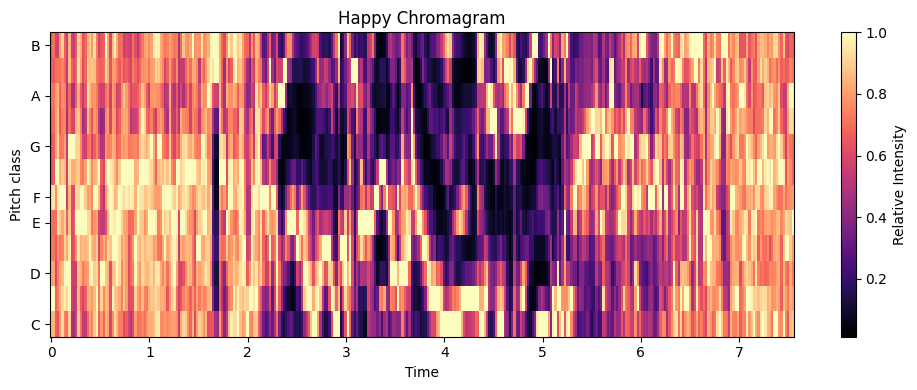

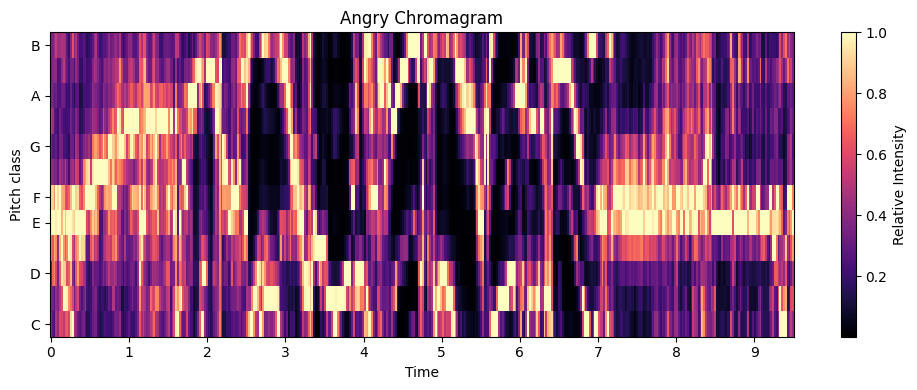

In [78]:
chromagram = librosa.feature.chroma_stft(y=happy_waveform, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
plt.colorbar(label='Relative Intensity')
plt.title('Happy Chromagram')
plt.tight_layout()

chromagram = librosa.feature.chroma_stft(y=angry_waveform, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
plt.colorbar(label='Relative Intensity')
plt.title('Angry Chromagram')
plt.tight_layout()

## Feature Extraction


In [79]:
import librosa

def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0) 
    return mfc_coefficients

In [80]:
def get_features(file):
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # compute features of soundfile
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)

        feature_matrix=np.array([])
        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))
        
        return feature_matrix

### Load the Dataset and Compute Features


In [81]:
#Emotions in the RAVDESS dataset
emotions ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [82]:
import os, glob

def load_augmented_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/RAVDESS dataset/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        print(file_name)
        print(file_name.split("-")[2])
        emotion=emotions[file_name.split("-")[2]]
        features = get_features(file)
        X.append(features)
        y.append(emotion)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{2870} audio samples',end=' ')
    # Return arrays to plug into sklearn's cross-validation algorithms
    for file in glob.glob("/content/drive/MyDrive/Augmented_files/*"):
        
        file_name=os.path.basename(file)
        print(file_name)
        print(file_name.split("-")[2])
        emotion=emotions[file_name.split("-")[2]]
        features = get_features(file)
        X.append(features)
        y.append(emotion)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{2870} audio samples',end=' ')
    
    return np.array(X), np.array(y)

In [83]:
features, emotions = load_augmented_data()

03-01-02-01-01-01-07.wav
02
 Processed 1/2870 audio samples 03-01-02-01-02-02-07.wav
02
 Processed 2/2870 audio samples 03-01-01-01-02-02-07.wav
01
 Processed 3/2870 audio samples 03-01-01-01-02-01-07.wav
01
 Processed 4/2870 audio samples 03-01-02-01-01-02-07.wav
02
 Processed 5/2870 audio samples 03-01-01-01-01-02-07.wav
01
 Processed 6/2870 audio samples 03-01-02-01-02-01-07.wav
02
 Processed 7/2870 audio samples 03-01-01-01-01-01-07.wav
01
 Processed 8/2870 audio samples 03-01-08-01-01-02-07.wav
08
 Processed 9/2870 audio samples 03-01-07-02-02-02-07.wav
07
 Processed 10/2870 audio samples 03-01-08-01-01-01-07.wav
08
 Processed 11/2870 audio samples 03-01-05-02-01-01-07.wav
05
 Processed 12/2870 audio samples 03-01-06-02-01-01-07.wav
06
 Processed 13/2870 audio samples 03-01-05-02-02-02-07.wav
05
 Processed 14/2870 audio samples 03-01-05-02-02-01-07.wav
05
 Processed 15/2870 audio samples 03-01-05-02-01-02-07.wav
05
 Processed 16/2870 audio samples 03-01-02-02-01-02-07.wav
02
 Proc

Let's see what the features we extracted look like:

In [84]:
print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) # make it pretty for display
features_df


Audio samples represented: 1435
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.720374,0.701346,0.691783,0.670687,0.653767,0.623988,0.609580,0.649196,0.691518,0.665956,...,0.657919,0.386946,-0.712663,1.013495,-1.195702,-2.266157,-0.820446,-2.718274,-0.168152,0.906702
1,0.738214,0.700985,0.721464,0.738079,0.723930,0.701306,0.695872,0.721043,0.750787,0.753046,...,-0.633285,1.778298,-2.052490,0.124657,-0.544228,-3.386164,-2.118833,-2.455601,-0.454294,1.586494
2,0.766068,0.763156,0.717020,0.723808,0.751661,0.742840,0.701961,0.692315,0.753875,0.756485,...,0.623641,-0.012974,-1.858779,0.645037,-1.576603,-2.234937,-1.621815,-2.523334,-1.096691,-0.067743
3,0.769281,0.754583,0.734605,0.735946,0.710724,0.702181,0.702106,0.685217,0.709859,0.751111,...,-1.325262,-0.211789,-2.807001,-0.279130,-2.850361,-4.134206,-2.581274,-3.948630,-2.508026,-1.044357
4,0.768762,0.718951,0.711171,0.743229,0.756723,0.723531,0.722330,0.722866,0.739491,0.755572,...,1.034622,-0.864431,-1.889875,0.756543,-2.529861,-1.787335,-1.538894,-2.925799,-0.800136,0.335323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0.626349,0.640664,0.646708,0.656050,0.705298,0.736351,0.686551,0.620645,0.637668,0.643970,...,-0.984921,-1.006468,0.908297,2.398036,1.264526,1.704660,2.995559,2.204216,1.476594,1.659347
1431,0.558387,0.512801,0.543878,0.594143,0.660390,0.672357,0.675587,0.622938,0.602744,0.565259,...,-1.350908,-1.910265,0.064023,1.889626,-0.237509,0.930823,0.389742,-4.018641,-2.953686,-0.918575
1432,0.625681,0.617922,0.644334,0.679645,0.696192,0.718201,0.732000,0.722783,0.704112,0.641830,...,-1.072792,-0.259823,-1.063562,0.618342,-0.176969,1.234851,0.130209,0.752572,2.122526,2.043373
1433,0.674173,0.655595,0.652641,0.658555,0.674564,0.684766,0.678047,0.635815,0.638231,0.613541,...,-1.390641,-1.912089,0.872325,-0.124900,-0.759790,0.202734,0.318381,-0.096167,-1.317991,0.132359


We have a matrix of dim 1440 x 180. Looks good - 1440 audio samples, one per row, with a series of
180 numerical features for each sample. 

**Each of the 1440 feature arrays has 180 features composed of 12 chromagram pitch classes + 128 mel spectrogram bands + 40 MFC coefficients.**

Let's see the class balance of our dataset:

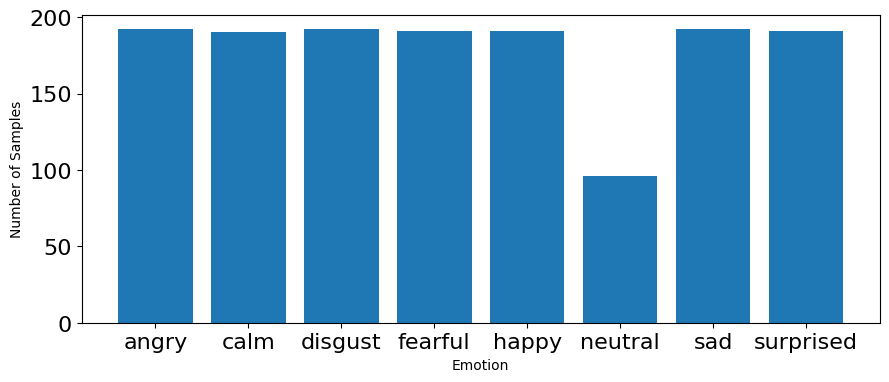

In [85]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x=range(8), height=count)
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

### Feature Scaling


In [86]:
# We would usually use df.describe(), but it provides a bit of a mess of information we don't need at the moment.
def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.loc[:,:11]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}') 

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.loc[:,12:139]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.loc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')
    
print_features(features_df)

12 Chromagram features:           min = 0.310,     max = 0.874,     mean = 0.666,     deviation = 0.085

128 Mel Spectrogram features:     min = 0.000,     max = 149.208,     mean = 0.188,     deviation = 1.600

40 MFCC features:                 min = -873.242,    max = 115.126,    mean = -14.626,    deviation = 98.494


**There's an obvious imbalance in the variance our features; Our features indeed belong to very different distributions:** our MFC coefficients' deviation is greater than the other features by orders of magnitude. That does not mean MFC coefficients are the most important feature, but rather it is a property of the way they are computed.  We will certainly need to scale this feature set.

We have the choice of sklearn's StandardScaler and MinMaxScaler. Standard scaling subtracts the mean of each feature and divides it by the standard deviation of that feature, producing features with mean at zero and unit variance - that is, a variance and standard deviation of 1. Min-Max scaling transforms each feature to be within a bounded interval that we specify. 

In practice, **MinMax scaling is especially useful when we know our features should be in a bounded interval**, such as pixel values in [0,255], while **standard scaling is perhaps more practical for features with unknown distributions** because centering the features at zero-mean with a standard deviation of 1 means extreme values will have less of an impact on the model's learned weights, i.e. the model is less sensitive to outliers. 

We'll create MinMax scaled features as well so we can give them a try later on to confirm that standard scaling is better in the absence of knowledge on the appropriate distribution for a dataset's features.

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features 
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features
features_minmax = scaler.fit_transform(features_minmax)

Make sure our features are properly scaled:

In [88]:
print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)

Standard Scaling:

12 Chromagram features:           min = -3.957,     max = 2.645,     mean = -0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.475,     max = 36.480,     mean = 0.000,     deviation = 1.000

40 MFCC features:                 min = -4.209,    max = 6.240,    mean = -0.000,    deviation = 1.000


MinMax Scaling:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.611,     deviation = 0.181

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.015,     deviation = 0.061

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.406,    deviation = 0.166


Perfect. Zero mean and unit variance for standard scaling and in the range [0,1] for MinMax scaling - a default when we don't specify values. We can now move on to building predictive models for these features.

## Classical Machine Learning Models



### Training: The 80/20 Split and Validation


In [89]:
############# Unscaled test/train set #############
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    features_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    features_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

### Comparing Models


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

,Classifier,Accuracy Score
0,KNeighborsClassifier,56.45%
4,RandomForestClassifier,55.75%
1,SVC,55.40%
2,SVC RBF kernel,51.57%
3,DecisionTreeClassifier,40.77%
5,AdaBoostClassifier,33.80%
6,GaussianNB,28.92%
7,QuadraticDiscriminantAnalysis,23.69%


Let's pick the top three - Random Forests, SVC, and kNN - and take a closer look at each of them.

### The Support Vector Machine Classifier


A linear kernel should always be tested because **a linear kernel is much faster to train than a non-linear kernel**; however, properly tuned, a non-linear kernel often provides the best possible predictive performance. **RBF (radial basis function) is a good default to use for a non-linear kernel** and often is the best non-linear kernel because it usually provides a higher accuracy compared to other non-linear kernels at the cost of higher computational complexity. We can afford to try the RBF kernel because our dataset is small.

In [91]:
from sklearn.svm import SVC

model = SVC(
    C=10,
    gamma='auto',
    kernel='rbf',
    random_state=69
)

model.fit(X_train, y_train)

print(f'SVC Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'SVC Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

SVC Model's accuracy on training set is 100.00%
SVC Model's accuracy on test set is 56.45%


Not bad at all for the relatively simple SVC model. **C is a regularization parameter inversely proportional to size of l2 penalty.** It might do well to optimize the SVC model further if we don't find a better one. As it stands, we are looking for considerably higher performance in this task. 

### k Nearest Neighbours 


In [92]:
from sklearn.neighbors import KNeighborsClassifier

####### Default kNN  ########
model = KNeighborsClassifier(
)

model.fit(X_train, y_train)

print(f'Default kNN Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default kNN Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')

##### (hastily) tuned kNN ######
model = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'distance',
    algorithm = 'brute',
    leaf_size = 30,
    n_jobs=4
)

model.fit(X_train, y_train)

print(f'kNN Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'kNN Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default kNN Model's accuracy on training set is 65.68%
Default kNN Model's accuracy on test set is 53.31%

kNN Model's accuracy on training set is 100.00%
kNN Model's accuracy on test set is 52.26%


**The brute-force algorithm computes distances between all pairs of points in the training set; works especially well for small datasets** but wildly inefficient w.r.t. increasing samples and feature space dimension. Not bad for 2 minutes of work, but still not suitable for this task.

### Random Forests 


In [94]:
from sklearn.ensemble import RandomForestClassifier

####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500, 
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = 1, # more on this below
    random_state=69  
) 

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default Random Forest Model's accuracy on training set is 100.00%
Default Random Forest Model's accuracy on test set is 55.40%

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 56.45%


Not bad for zero effort put into the default model. **Random Forests make a good benchmark model**, especially when strapped for time. For comparison, SVC with default hyperparameters spits out a measly 30% accuracy for this task.

**_Max features_ defines size of random feature subset decided upon at each node; sqrt(#features) is a good default for classification. Max features must be set to have a 'real' Random Forest.** 

**_Gini_ and _Entropy_ are functions computing quality of classified samples within each node; they almost always provide similar performance but Entropy is more suited to classification while Gini is better for continuous variables.** 

**An ensemble of high variance, low bias decision trees _generally_ combine to create a low variance, low bias Random Forest when properly tuned.** In this way, Random Forests are _generally_ less susceptible to overfitting, although clearly not always as demonstrated here.

#### OOB Score
OOB score is an internal model performance metric unique to Random Forests, though further on I will talk about evaluating models in more depth using K-Fold Cross Validation, a technique to get a more realistic picture of a model's performance. While we would usually apply KFold CV to the machine learnings models above, we would not necessarily do so for the Random Forest. Why? Because Random Forests internally calculate a metric known as the **Out-of-Bag Score** (OOB Score).

Each decision tree in the Random Forest trains on a slightly different set of data. Each tree's training set is obtained by **bootstrapping**: training data is randomly sampled with replacement from the input data. As such, the deviations in the original training dataset have much less of an impact on the the final prediction output by a Random Forest ensemble, which is determined by a majority vote of the predictions of each decision tree in the forest. This confers the advantage of a **reduced variance in the complete ensemble model with no trade-off in bias.**

When we combine bootstrapping with an ensemble model, we call it **bagging**. A more intuitive name for this method is **bootstrap aggregation** - aptly named based on the combination of decision trees trained on bootstrapped data. When we train a model this way, in particular a Random Forest, each decision tree is scored against its out-of-bag (OOB) samples, i.e. those which were not included in training that particular decision tree. As in K-Fold CV, we're scoring the ensemble model on a variety of validation sets. The combination of all **OOB scores** for each decision tree makes up the OOB score for the Random Forest.  

In this way, we get a sort of **"free" cross-validation out of the Random Forest.**

In [95]:
print(f'Random Forest Model\'s OOB score: {100*model.oob_score_:.2f}%')

Random Forest Model's OOB score: 55.49%


I find the Random Forest model conceptually beautiful and their performance to be consistently impressive. 

As wonderful as Random Forests are, it's clear that we're going to need to pull out bigger guns if we want to get appreciable performance on this dataset, perhaps even with good generalizability on test data. DNNs are the next step-up in complexity from classical machine learning models, and we will start at the first rung on that ladder:

## The MLP Model for Classification


In [96]:
from sklearn.neural_network import MLPClassifier

# Default 'off-the-shelf' MLP from sklearn
model = MLPClassifier(
    random_state = 69
)

#################### unscaled features #####################
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

model.fit(X_train, y_train)

print(f'Possible emotions predicted by model:{model.classes_}')
print(f'Unscaled MLP Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Unscaled MLP Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')



Possible emotions predicted by model:['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Unscaled MLP Model's accuracy on training set is 66.03%
Unscaled MLP Model's accuracy on test set is 52.61%


In [97]:
#################### minmax scaled #######################
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    features_minmax, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

# Fit the model again on the minmax scaled features
model.fit(X_train_minmax, y_train)

print(f'MinMax scaled MLP Model\'s accuracy on training set is {100*model.score(X_train_minmax, y_train):.2f}%')
print(f'MinMax sacled MLP Model\'s accuracy on test set is {100*model.score(X_test_minmax, y_test):.2f}%\n')

#################### standard scaled #######################
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    features_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)
# Fit the model again on the scaled features
model.fit(X_train_scaled, y_train)

print(f'Standard scaled MLP Model\'s accuracy on training set is {100*model.score(X_train_scaled, y_train):.2f}%')
print(f'Standard scaled MLP Model\'s accuracy on test set is {100*model.score(X_test_scaled, y_test):.2f}%')

MinMax scaled MLP Model's accuracy on training set is 66.20%
MinMax sacled MLP Model's accuracy on test set is 56.45%

Standard scaled MLP Model's accuracy on training set is 99.56%
Standard scaled MLP Model's accuracy on test set is 68.29%


### Choice of Hyperparameters


In [98]:
from sklearn.model_selection import GridSearchCV

# Now that we know standard scaling is best for our features, we'll use those for our training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

# Initialize the MLP Classifier and choose parameters we want to keep constant
model = MLPClassifier(
    # tune batch size later 
    batch_size=256,  
    # keep random state constant to accurately compare subsequent models
    random_state=69
)

# Choose the grid of hyperparameters we want to use for Grid Search to build our candidate models
parameter_space = {
    # A single hidden layer of size between 8 (output classes) and 180 (input features) neurons is most probable
    # It's a bad idea at guessing the number of hidden layers to have
    # ...but we'll give 2 and 3 hidden layers a shot to reaffirm our suspicions that 1 is best
    'hidden_layer_sizes': [(8,), (180,), (300,),(100,50,),(10,10,10)], 
    'activation': ['tanh','relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'epsilon': [1e-08, 0.1 ],
    'learning_rate': ['adaptive', 'constant']
}
   
# Create a grid search object which will store the scores and hyperparameters of all candidate models 
grid = GridSearchCV(
    model, 
    parameter_space,
    cv=10,
    n_jobs=4)
# Fit the models specified by the parameter grid 
grid.fit(X_train, y_train)

# get the best hyperparameters from grid search object with its best_params_ attribute
print('Best parameters found:\n', grid.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'epsilon': 1e-08, 'hidden_layer_sizes': (300,), 'learning_rate': 'adaptive', 'solver': 'adam'}


## Training and Evaluating the MLP Model

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

model = MLPClassifier(
    activation='logistic', 
    solver='adam', 
    alpha=0.001, 
    beta_1=0.9,
    beta_2=0.999,
    batch_size=256, 
    epsilon=1e-08, 
    hidden_layer_sizes=(300,), 
    learning_rate='adaptive',
    max_iter=1000, 
    random_state=69,
)

model.fit(X_train, y_train)

print(f'MLP Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'MLP Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

MLP Model's accuracy on training set is 100.00%
MLP Model's accuracy on test set is 67.94%


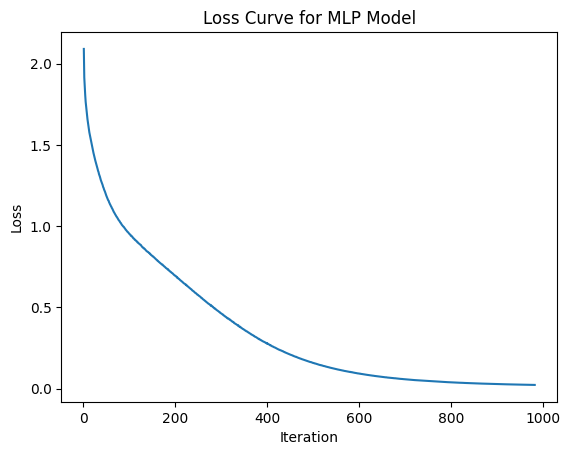

In [100]:
plt.figure()
plt.plot([num for num in range(1,model.n_iter_ +1)], model.loss_curve_)
plt.title('Loss Curve for MLP Model')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

### The Confusion Matrix


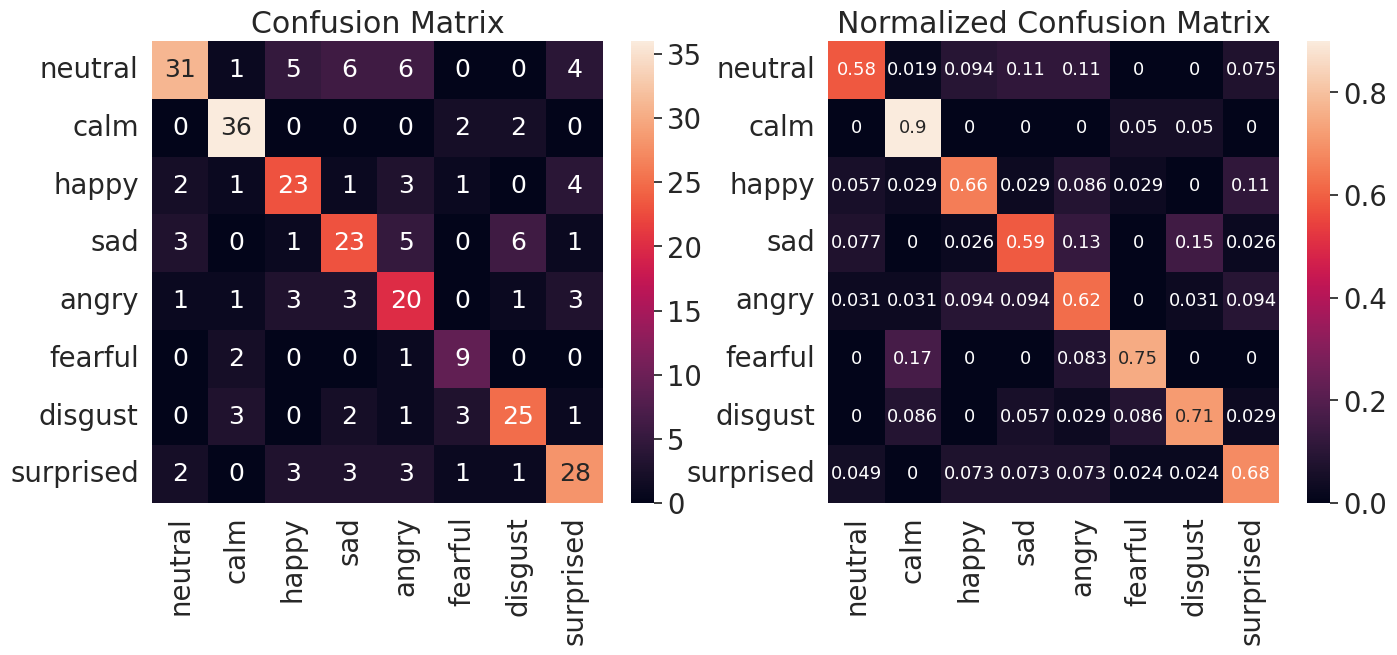

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sn # I like seaborn's confusion matrix over sklearn's default

# get predictions on test set 
test_emotion_predictions = model.predict(X_test)
test_emotion_groundtruth = y_test

# build confusion matrix and normalized confusion matrix
conf_matrix = confusion_matrix(test_emotion_groundtruth, test_emotion_predictions)
conf_matrix_norm = confusion_matrix(test_emotion_groundtruth, test_emotion_predictions,normalize='true')

# set labels for matrix axes from emotions
emotion_list =['neutral','calm','happy','sad','angry','fearful','disgust','surprised']
emotion_name = [emotion for emotion in emotion_list]

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=emotion_name, columns=emotion_name)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=emotion_name, columns=emotion_name)

# plot confusion matrices
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8) # emotion label and title size
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18}) #annot_kws is value font
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sn.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 13}) #annot_kws is value font

plt.show()

### K-Fold Cross-Validation


In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(
    n_splits=10, 
    random_state=69, 
    shuffle=True
)

scores = []
for train_indices, test_indices in kfold.split(X_train, y_train):
    # fit model to training fold
    model.fit(X_train[train_indices], y_train[train_indices])
    # score the model on validation fold
    scores.append(model.score(X_train[test_indices], y_train[test_indices]))

print('KFold CV scores for MLP:');[print(f'{(100*score):.2f}%') for score in scores]
print(f'Mean score of KFold CV for MLP: {100*np.mean(scores):.2f}% ± {100*np.std(scores):.2f}%')